# Breast Cancer 

## Question 2:

2.  **Ensemble Methods**:

    - Use the `breast_cancer` dataset from `sklearn.datasets`.
    - Compare the performance (F1 Score and AUC) of `DecisionTreeClassifier`, `RandomForestClassifier`, and `GradientBoostingClassifier`.
    - Tune the hyperparameters of each classifier using `GridSearchCV` with cross-validation.

In [1]:
# Essentials
import pandas as pd
import numpy as np

# Charting
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from scipy.stats import randint, uniform

# SciKit Learn Preprocessing
from sklearn.preprocessing import StandardScaler

# Pipeline and column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Train test split
from sklearn.model_selection import train_test_split

# Grid Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

# Model Selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score

In [2]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

In [3]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
print(breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
X = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])

In [6]:
y = pd.DataFrame(breast_cancer['target'], columns=['Benign'])

In [7]:
y.value_counts()

Benign
1         357
0         212
Name: count, dtype: int64

**0 is Malignant, 1 is Benign**

### EDA

In [8]:
df = pd.concat([X, y], axis=1)

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Benign                     0
dtype: int64

In [13]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**All data are numerical. There is no duplicated entries or missing value.**

In [14]:
correlation_with_target = df.corr(numeric_only=True)['Benign'].sort_values(key=abs, ascending=False)
print("Top correlated features with target:")
print(correlation_with_target)

Top correlated features with target:
Benign                     1.000000
worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -

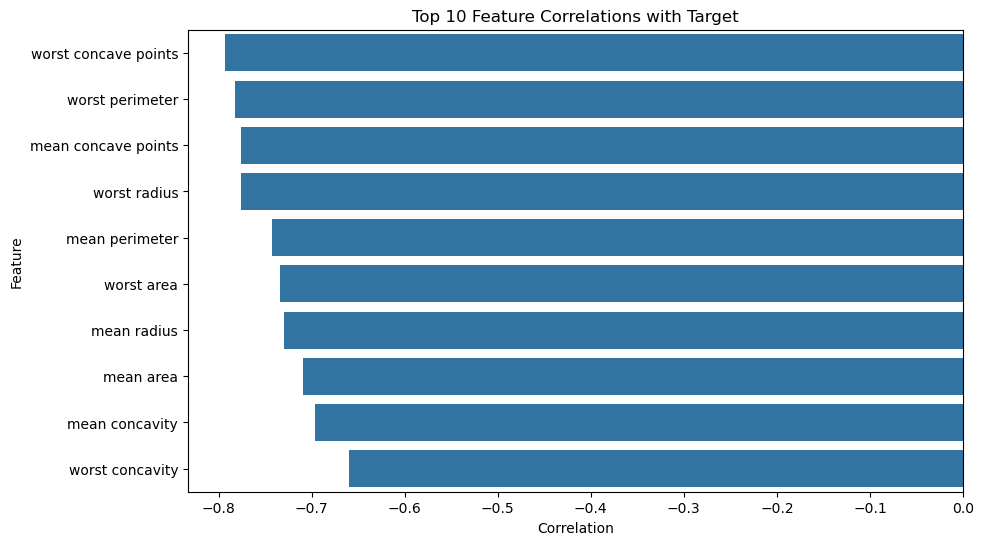

In [15]:
top_features = correlation_with_target[1:11].index  
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target[top_features], y=top_features)
plt.title("Top 10 Feature Correlations with Target")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

**The above features are highly correlated to malignant tumor. Please beware that the target of 1 represent benign tumor. Therefore it is negatively correlated to benign tumor.**

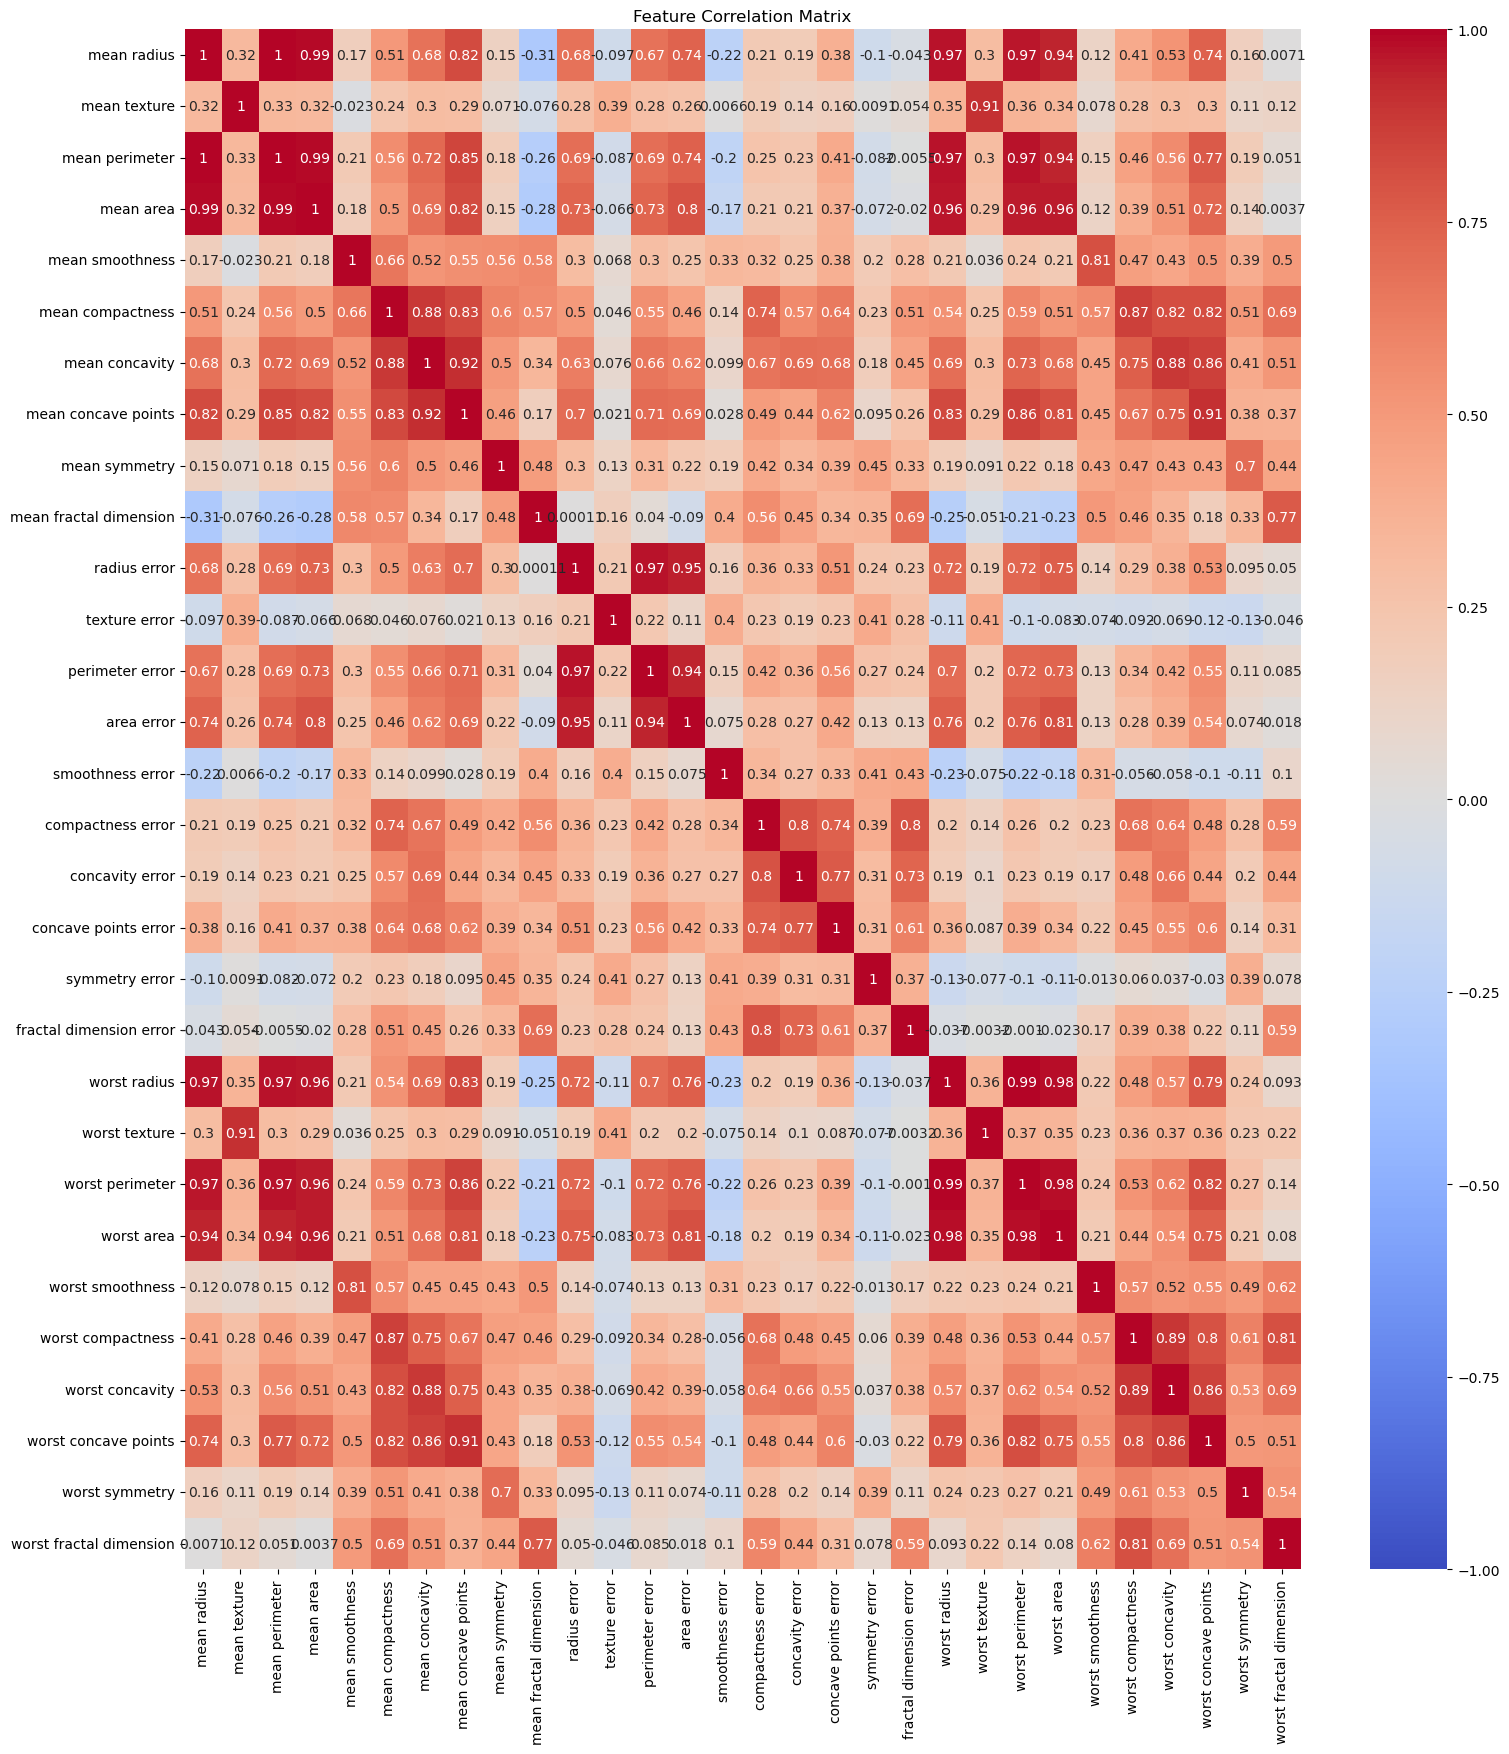

In [16]:
# Only use numerical features
corr_matrix = df.drop(columns='Benign').corr()

plt.figure(figsize=(18, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, vmax=1.0, vmin=-1.0)
plt.title("Feature Correlation Matrix")
plt.show()

**There are many features that are highly correlated with each other. Therefore, we will drop the highly correlated features.**

## Preprocessing Pipeline

In [17]:
X.shape

(569, 30)

In [18]:
# The following code is supplied by ChatGPT
# Upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
threshold = 0.90
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

print("Highly correlated features to drop:")
print(to_drop)


Highly correlated features to drop:
['mean perimeter', 'mean area', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concave points']


In [19]:
X_reduced = X.drop(columns=to_drop)
X = X_reduced
feature_names = X.columns

In [20]:
y = y.values.ravel()

In [21]:
random_state = 0

In [22]:
X_train, X_test_temp, y_train, y_test_temp = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_test_temp, y_test_temp, test_size=0.5, random_state=random_state)

In [23]:
numeric_cols = X.select_dtypes(include='number').columns
numeric_cols

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

In [24]:
len(numeric_cols)

20

In [25]:
# ----------------------------
# Transformers
# ----------------------------

numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

**Decision tree class model will not benefit from feature scaling. This feature is added as a standard template, in case other models are required.**

In [26]:
# ----------------------------
# ColumnTransformer
# ----------------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_cols),
])

In [27]:
# ----------------------------
# Decision Tree Pipeline
# ----------------------------
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=random_state))
])

# ----------------------------
# Random Forest Pipeline
# ----------------------------
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=random_state, n_jobs=-1))
])


# ----------------------------
# Gradient Boosting Pipeline
# ----------------------------
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=random_state))
])

### Base Model Training

#### Decision Tree

In [28]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=0))])

In [29]:
## Decision Tree Metrics
# Compute metrics - Validation Error Error
dt_accuracy = accuracy_score(y_val, dt_pipeline.predict(X_val))
dt_precision = precision_score(y_val, dt_pipeline.predict(X_val))
dt_recall = recall_score(y_val, dt_pipeline.predict(X_val))
dt_f1 = f1_score(y_val, dt_pipeline.predict(X_val))
dt_auc = roc_auc_score(y_val, dt_pipeline.predict_proba(X_val)[:,1])

print("Decision Tree Validation Metrics")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1:", dt_f1)
print("AUC:", dt_auc)

Decision Tree Validation Metrics
Accuracy: 0.9122807017543859
Precision: 0.96875
Recall: 0.8857142857142857
F1: 0.9253731343283582
AUC: 0.9201298701298701


In [30]:
def feature_importance(pipeline):
    # Access trained model from pipeline
    model = pipeline.named_steps['model']

    # Get importances
    importances = model.feature_importances_

    # Create DataFrame for easy plotting
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print(feat_imp_df.head(10))


In [31]:
feature_importance(dt_pipeline)

              Feature  Importance
4      mean concavity    0.596627
0         mean radius    0.138118
1        mean texture    0.078355
17    worst concavity    0.062165
11    concavity error    0.044242
13     symmetry error    0.028527
16  worst compactness    0.018491
7        radius error    0.017306
15   worst smoothness    0.014930
9    smoothness error    0.001240


#### Random Forest 

In [32]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object'))])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=0))])

In [33]:
## Random Forest Metrics
# Compute metrics - Validation Error Error
rf_accuracy = accuracy_score(y_val, rf_pipeline.predict(X_val))
rf_precision = precision_score(y_val, rf_pipeline.predict(X_val))
rf_recall = recall_score(y_val, rf_pipeline.predict(X_val))
rf_f1 = f1_score(y_val, rf_pipeline.predict(X_val))
rf_auc = roc_auc_score(y_val, rf_pipeline.predict_proba(X_val)[:,1])

print("Decision Tree Validation Metrics")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1:", rf_f1)
print("AUC:", rf_auc)

Decision Tree Validation Metrics
Accuracy: 0.9298245614035088
Precision: 0.9428571428571428
Recall: 0.9428571428571428
F1: 0.9428571428571428
AUC: 0.9896103896103896


In [34]:
feature_importance(rf_pipeline)


                 Feature  Importance
4         mean concavity    0.209746
0            mean radius    0.185997
17       worst concavity    0.111262
7           radius error    0.087620
16     worst compactness    0.057857
3       mean compactness    0.057598
1           mean texture    0.034772
15      worst smoothness    0.032372
12  concave points error    0.032171
11       concavity error    0.028182


#### Gradient Boosting

In [35]:
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object'))])),
                ('model', GradientBoostingClassifier(random_state=0))])

In [36]:
## Gradient Boosting Metrics
# Compute metrics - Validation Error Error
gb_accuracy = accuracy_score(y_val, gb_pipeline.predict(X_val))
gb_precision = precision_score(y_val, gb_pipeline.predict(X_val))
gb_recall = recall_score(y_val, gb_pipeline.predict(X_val))
gb_f1 = f1_score(y_val, gb_pipeline.predict(X_val))
gb_auc = roc_auc_score(y_val, gb_pipeline.predict_proba(X_val)[:,1])

print("Decision Tree Validation Metrics")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1:", gb_f1)
print("AUC:", gb_auc)

Decision Tree Validation Metrics
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
AUC: 1.0


In [37]:
feature_importance(gb_pipeline)

              Feature  Importance
4      mean concavity    0.527455
0         mean radius    0.215998
17    worst concavity    0.054385
1        mean texture    0.051418
15   worst smoothness    0.045132
7        radius error    0.032668
18     worst symmetry    0.019131
11    concavity error    0.013906
10  compactness error    0.009735
16  worst compactness    0.008646


#### Baseline Model Analysis

In [38]:
print("F1 Score")
print("Decision tree:", dt_f1)
print("Random Forest:", rf_f1)
print("Gradient Boosting:", gb_f1)


F1 Score
Decision tree: 0.9253731343283582
Random Forest: 0.9428571428571428
Gradient Boosting: 1.0


In [39]:
print("AUC Score")
print("Decision tree:", dt_auc)
print("Random Forest:", rf_auc)
print("Gradient Boosting:", gb_auc)

AUC Score
Decision tree: 0.9201298701298701
Random Forest: 0.9896103896103896
Gradient Boosting: 1.0


**The baseline analysis without fine tuning shows that Gradient Boosting achieve the best F1 and AUC score.**  

### Grid Search

In [40]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

#### Decision Tree

In [41]:
# Decision tree parameter search grid randomized
rand_dt_param_grid = {
    'model__criterion': ['gini','entropy','log_loss'],
    'model__max_depth': randint(3,30),
    'model__max_features': ["sqrt", "log2", None],
    'model__max_leaf_nodes': randint(2,20),
    'model__min_samples_leaf': randint(1, 20),
    'model__min_samples_split': randint(2,20),
}

In [42]:
# Run randomized grid search - may take a while
rand_dt_grid_search = RandomizedSearchCV(dt_pipeline, rand_dt_param_grid, n_iter=100, cv=cv, scoring='f1', n_jobs=-1, random_state=random_state)
rand_dt_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture...
                                        'model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'model__max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1503a57d0>,
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x150356a10>,
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x150357a50>},
                   random_state=0, scoring='f1')

In [43]:
rand_dt_grid_search.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 15,
 'model__max_features': None,
 'model__max_leaf_nodes': 9,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 7}

In [44]:
# Decision tree parameter search grid
dt_param_grid = {
    'model__criterion': ['gini', 'log_loss', 'entropy'],
    'model__max_depth': [3, 4, 5, 6, 7],
    'model__max_features': ["sqrt", "log2", None],
    'model__max_leaf_nodes': [7, 8, 9, 10, 11],
    'model__min_samples_leaf': [1, 2, 3],
    'model__min_samples_split': [2, 3, 5],
}

In [45]:
# Run grid search - may take a while
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=cv, scoring='f1', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error'...
       'worst fractal dimension'],
      dtype='object'))])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'log_loss', 'entropy'],
                         'model__max_depth': [3, 4, 5, 6, 7],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__max_leaf_nodes': [7, 8, 9, 10, 11],
                         'model__min_samples_leaf': [1, 2, 3],
                         'model__min_samples_split': [2, 3, 5]},
             scoring='f1')

In [46]:
dt_grid_search.best_params_

{'model__criterion': 'log_loss',
 'model__max_depth': 5,
 'model__max_features': None,
 'model__max_leaf_nodes': 9,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2}

In [47]:
## Decision Tree Metrics
# Compute metrics - Validation Error Error
dt_accuracy = accuracy_score(y_val, dt_grid_search.predict(X_val))
dt_precision = precision_score(y_val, dt_grid_search.predict(X_val))
dt_recall = recall_score(y_val, dt_grid_search.predict(X_val))
dt_f1 = f1_score(y_val, dt_grid_search.predict(X_val))
dt_auc = roc_auc_score(y_val, dt_grid_search.predict_proba(X_val)[:,1])

print("Decision Tree Validation Metrics")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1:", dt_f1)
print("AUC:", dt_auc)

Decision Tree Validation Metrics
Accuracy: 0.9122807017543859
Precision: 0.9411764705882353
Recall: 0.9142857142857143
F1: 0.927536231884058
AUC: 0.9415584415584416


In [48]:
feature_importance(dt_grid_search.best_estimator_)

             Feature  Importance
4     mean concavity    0.567771
0        mean radius    0.227911
18    worst symmetry    0.066122
1       mean texture    0.059341
13    symmetry error    0.040328
7       radius error    0.038527
3   mean compactness    0.000000
2    mean smoothness    0.000000
8      texture error    0.000000
9   smoothness error    0.000000


#### Random Forest

In [49]:
# Random Forest parameter search grid - Randomized
rand_rf_param_grid = {
    'model__n_estimators': randint(300, 500),   
    'model__max_depth': randint(5, 20),     
    'model__min_samples_split': randint(2, 5),          
    'model__min_samples_leaf': randint(1, 5),           
    'model__max_features': uniform(0.1, 0.3),  
    #'model__bootstrap': [True, False], 
    'model__bootstrap': [False],      
    #'model__class_weight': ['balanced', 'balanced_subsample', None],  
}

In [ ]:
# Run randomized grid search - may take a while (less than 3m)
rand_rf_grid_search = RandomizedSearchCV(rf_pipeline, rand_rf_param_grid, n_iter=100, cv=5, scoring='f1', n_jobs=-1, random_state=random_state)
rand_rf_grid_search.fit(X_train, y_train)

In [95]:
rand_rf_grid_search.best_params_

{'model__bootstrap': False,
 'model__max_depth': 18,
 'model__max_features': 0.16915990705189898,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 421}

In [96]:
# Random Forest parameter search grid
rf_param_grid = {
    'model__n_estimators': [400, 409, 415],   
    'model__max_depth': [15, 16, 17],     
    'model__min_samples_split': [2, 3],          
    'model__min_samples_leaf': [1, 2, 3],           
    'model__max_features': [0.08, 0.10, 0.13], 
    'model__bootstrap': [False],       
    #'model__class_weight': ['balanced', 'balanced_subsample', None],  
}

In [97]:
# Run grid search - may take a while (approx 5m or less)
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity error'...
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=0))]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [False],
                         'model__max_depth': [15, 16, 17],
                         'model__max_features': [0.08, 0.1, 0.13],
                         'model__min_samples_leaf': [1, 2, 3],
                         'model__min_samples_split': [2, 3],
                         'model__n_estimators': [400, 409, 415]},
             scoring='f1')

In [98]:
rf_grid_search.best_params_

{'model__bootstrap': False,
 'model__max_depth': 15,
 'model__max_features': 0.1,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 409}

In [99]:
## Random Forest Metrics
# Compute metrics - Validation Error Error
rf_accuracy = accuracy_score(y_val, rf_grid_search.predict(X_val))
rf_precision = precision_score(y_val, rf_grid_search.predict(X_val))
rf_recall = recall_score(y_val, rf_grid_search.predict(X_val))
rf_f1 = f1_score(y_val, rf_grid_search.predict(X_val))
rf_auc = roc_auc_score(y_val, rf_grid_search.predict_proba(X_val)[:,1])

print("Decision Tree Validation Metrics")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1:", rf_f1)
print("AUC:", rf_auc)

Decision Tree Validation Metrics
Accuracy: 0.9473684210526315
Precision: 0.9444444444444444
Recall: 0.9714285714285714
F1: 0.9577464788732394
AUC: 0.9922077922077922


In [100]:
feature_importance(rf_grid_search.best_estimator_)

                 Feature  Importance
0            mean radius    0.150617
4         mean concavity    0.131475
17       worst concavity    0.115351
7           radius error    0.101513
16     worst compactness    0.063737
3       mean compactness    0.058892
1           mean texture    0.047335
11       concavity error    0.043238
15      worst smoothness    0.037087
12  concave points error    0.033899


#### Gradient Boosting

In [101]:
# Gradient Boosting parameter search grid - Randomized
rand_gb_param_grid = {
    'model__n_estimators': randint(100, 400),      
    'model__learning_rate': uniform(0.01, 0.2),     
    'model__max_depth': randint(3, 10),              
    #'model__min_samples_split': randint(2, 20),     
    #'model__min_samples_leaf': randint(1, 20),          
    #'model__subsample': uniform(0.7, 0.3),               
    #'model__max_features': ["sqrt", "log2", None]  
}

In [102]:
# Run randomized grid search - may take a while
rand_gb_grid_search = RandomizedSearchCV(gb_pipeline, rand_gb_param_grid, n_iter=100, cv=5, scoring='f1', n_jobs=-1, random_state=random_state)
rand_gb_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x14579e890>,
                                        'model__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14579cb90>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14579c910>},
                   random_state=0, scoring='f1')

In [103]:
rand_gb_grid_search.best_params_

{'model__learning_rate': 0.09143665944519994,
 'model__max_depth': 4,
 'model__n_estimators': 173}

In [104]:
# Gradient Boosting parameter search grid
gb_param_grid = {
    'model__n_estimators': [100, 173, 250],      
    'model__learning_rate': [0.01, 0.08, 0.09, 0.1],     
    'model__max_depth': [3, 4, 5],              
    #'model__min_samples_split': [10, 18, 20],     
    #'model__min_samples_leaf': [10, 12, 20],          
    #'model__subsample': [0.1, 0.8, 1.0],               
    #'model__max_features': ['sqrt', 'log2'],   
}

In [105]:
# Run grid search - may take a while
gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, scoring='f1', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity error'...
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object'))])),
                                       ('model',
                                        GradientBoostingClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.08, 0.09, 0.1],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [100, 173, 250]},
             scoring='f1')

In [106]:
gb_grid_search.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__n_estimators': 173}

In [107]:
## Gradient Boosting Metrics
# Compute metrics - Validation Error Error
gb_accuracy = accuracy_score(y_val, gb_grid_search.predict(X_val))
gb_precision = precision_score(y_val, gb_grid_search.predict(X_val))
gb_recall = recall_score(y_val, gb_grid_search.predict(X_val))
gb_f1 = f1_score(y_val, gb_grid_search.predict(X_val))
gb_auc = roc_auc_score(y_val, gb_grid_search.predict_proba(X_val)[:,1])

print("Decision Tree Validation Metrics")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1:", gb_f1)
print("AUC:", gb_auc)

Decision Tree Validation Metrics
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
AUC: 1.0


In [108]:
feature_importance(gb_grid_search.best_estimator_)

              Feature  Importance
4      mean concavity    0.573997
0         mean radius    0.161026
1        mean texture    0.056636
17    worst concavity    0.034481
15   worst smoothness    0.033056
7        radius error    0.024520
10  compactness error    0.024358
2     mean smoothness    0.017680
11    concavity error    0.014117
13     symmetry error    0.012040


#### Comparison of F1 and AUC

In [109]:
print("F1 Score")
print("Decision tree:", dt_f1)
print("Random Forest:", rf_f1)
print("Gradient Boosting:", gb_f1)

F1 Score
Decision tree: 0.927536231884058
Random Forest: 0.9577464788732394
Gradient Boosting: 1.0


In [110]:
print("AUC Score")
print("Decision tree:", dt_auc)
print("Random Forest:", rf_auc)
print("Gradient Boosting:", gb_auc)

AUC Score
Decision tree: 0.9415584415584416
Random Forest: 0.9922077922077922
Gradient Boosting: 1.0


**Base on the F1 and AUC score, the best model is Gradient Boosting.**

### Application of Best Models

In [114]:
best_model = gb_grid_search.best_estimator_
print('Best parameters', gb_grid_search.best_params_)

Best parameters {'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 173}


In [115]:
## Best Model Application
# Compute metrics - Test Error
best_model_accuracy = accuracy_score(y_test, best_model.predict(X_test))
best_model_precision = precision_score(y_test, best_model.predict(X_test))
best_model_recall = recall_score(y_test, best_model.predict(X_test))
best_model_f1 = f1_score(y_test, best_model.predict(X_test))
best_model_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])

print("Decision Tree Validation Metrics")
print("Accuracy:", best_model_accuracy)
print("Precision:", best_model_precision)
print("Recall:", best_model_recall)
print("F1:", best_model_f1)
print("AUC:", best_model_auc)

Decision Tree Validation Metrics
Accuracy: 0.9122807017543859
Precision: 0.9354838709677419
Recall: 0.90625
F1: 0.9206349206349206
AUC: 0.99


In [116]:
feature_importance(best_model)

              Feature  Importance
4      mean concavity    0.573997
0         mean radius    0.161026
1        mean texture    0.056636
17    worst concavity    0.034481
15   worst smoothness    0.033056
7        radius error    0.024520
10  compactness error    0.024358
2     mean smoothness    0.017680
11    concavity error    0.014117
13     symmetry error    0.012040


### Conclusion

**The best model for breast cancer data is Gradient Boosting.**

## End